<a href="https://colab.research.google.com/github/Kalki767/Zindi-Competition/blob/main/Tanzania_Tourism_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Connect the notebook to the google drive.

In [ ]:
FILE_PATH = "/content/drive/MyDrive/Tanzania Tourism Prediction/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import everything needed to manipulate and visualize the data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

3. Read the data from the connected google drive

In [ ]:
train_data = pd.read_csv(FILE_PATH + 'Train.csv')
test_data = pd.read_csv(FILE_PATH + 'Test.csv')

4. Check for null values in every column

In [ ]:
train_data.isna().sum()

,0
ID,0
country,0
age_group,0
travel_with,1114
total_female,3
total_male,5
purpose,0
main_activity,0
info_source,0
tour_arrangement,0


In [ ]:
train_data.shape

(4809, 23)

In [ ]:
train_data['travel_with'].unique()

array(['Friends/Relatives', nan, 'Alone', 'Spouse', 'Children',
       'Spouse and Children'], dtype=object)

In [ ]:
train_data['total_female'].unique()

array([ 1.,  0.,  2.,  4.,  3.,  5., 12., 10.,  6., nan, 11.,  7., 15.,
        9., 49.])

In [ ]:
train_data['total_male'].unique()

array([ 1.,  0.,  2.,  3.,  4.,  5.,  6., nan, 15., 17.,  7., 10., 12.,
       44.,  9.])

5. Fill the missing value for total male and total female by default to zero in the train and test data set

In [ ]:
train_data['total_male'].fillna(0, inplace = True)
train_data['total_female'].fillna(0, inplace = True)

In [ ]:
test_data['total_male'].fillna(0, inplace = True)
test_data['total_female'].fillna(0, inplace = True)

6. Identify the data entries who have only either one male or female but isnot tagged as alone then update the travel with for those entries to be alone

In [ ]:
missing_values = train_data.loc[
    ((train_data['total_male'] == 1) & (train_data['total_female'] == 0)) |
    ((train_data['total_male'] == 0) & (train_data['total_female'] == 1))
]
missing_values

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0
5,tour_1005,UNITED KINGDOM,25-44,NaN,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,No,Yes,Yes,No,9.0,3.0,Cash,Yes,Wildlife,120950.0
6,tour_1007,SOUTH AFRICA,45-64,Alone,0.0,1.0,Business,Mountain climbing,"Friends, relatives",Independent,...,No,No,No,No,9.0,0.0,Cash,Yes,Friendly People,466140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,tour_984,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,3.0,0.0,Credit Card,Yes,Friendly People,4552080.0
4798,tour_985,SWEDEN,45-64,NaN,1.0,0.0,Business,Wildlife tourism,others,Independent,...,No,No,No,No,3.0,0.0,Cash,No,No comments,1657500.0
4799,tour_986,UNITED STATES OF AMERICA,65+,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,19.0,0.0,Cash,Yes,Wildlife,18232500.0
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0


In [ ]:
#only one person is presented but no tag as alone
missing_alone = missing_values.loc[missing_values['travel_with'].isna()]
missing_alone.shape

(1085, 23)

In [ ]:
train_data.loc[
    ((train_data['total_male'] == 1) & (train_data['total_female'] == 0)) |
    ((train_data['total_male'] == 0) & (train_data['total_female'] == 1)), 'travel_with'
] = 'Alone'

In [ ]:
test_data.loc[
    ((test_data['total_male'] == 1) & (test_data['total_female'] == 0)) |
    ((test_data['total_male'] == 0) & (test_data['total_female'] == 1)), 'travel_with'
] = 'Alone'

7. Find out how many entries there are whose column for travel with is nan

In [ ]:
missing_values = train_data[train_data['travel_with'].isna()]
missing_values

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
638,tour_1785,UNITED KINGDOM,25-44,NaN,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,No,Yes,Yes,No,7.0,0.0,Cash,Yes,Friendly People,3149250.00
681,tour_1837,UNITED STATES OF AMERICA,1-24,NaN,0.0,4.0,Leisure and Holidays,Conference tourism,"Radio, TV, Web",Package Tour,...,Yes,No,Yes,No,10.0,0.0,Cash,Yes,No comments,4309500.00
706,tour_1869,UNITED STATES OF AMERICA,45-64,NaN,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,Yes,Yes,7.0,0.0,Cash,Yes,No comments,21713250.00
717,tour_1881,UNITED STATES OF AMERICA,45-64,NaN,7.0,2.0,Scientific and Academic,Wildlife tourism,"Newspaper, magazines,brochures",Package Tour,...,Yes,Yes,Yes,No,14.0,0.0,Cash,Yes,Friendly People,8038875.00
778,tour_195,EGYPT,25-44,NaN,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Newspaper, magazines,brochures",Independent,...,No,No,No,No,23.0,3.0,Cash,Yes,Wildlife,5304000.00
862,tour_2059,SWEDEN,1-24,NaN,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,No,No,No,No,32.0,7.0,Cash,Yes,Good service,2070000.00
917,tour_2121,ITALY,45-64,NaN,1.0,1.0,Leisure and Holidays,Beach tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,11.0,6.0,Cash,No,No comments,82957875.00
1002,tour_2223,CANADA,45-64,NaN,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,5.0,0.0,Cash,No,Wildlife,21810040.00
1149,tour_2409,GERMANY,25-44,NaN,2.0,5.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,14.0,0.0,Cash,Yes,Friendly People,8287500.00
1447,tour_2775,UNITED KINGDOM,45-64,NaN,2.0,0.0,Meetings and Conference,Wildlife tourism,others,Independent,...,No,No,No,No,1.0,0.0,Credit Card,No,Friendly People,497250.00


In [ ]:
train_data['travel_with'].unique()

array(['Friends/Relatives', 'Alone', 'Spouse', 'Children',
       'Spouse and Children', nan], dtype=object)

8. If there is only one male and female update the travel with column to be spouse

In [ ]:
train_data.loc[
    ((train_data['total_male'] == 1) & (train_data['total_female'] == 1)), 'travel_with'
] = 'Spouse'

In [ ]:
test_data.loc[
    ((test_data['total_male'] == 1) & (test_data['total_female'] == 1)), 'travel_with'
] = 'Spouse'

In [ ]:
missing_values = train_data[train_data['travel_with'].isna()]
missing_values

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
681,tour_1837,UNITED STATES OF AMERICA,1-24,NaN,0.0,4.0,Leisure and Holidays,Conference tourism,"Radio, TV, Web",Package Tour,...,Yes,No,Yes,No,10.0,0.0,Cash,Yes,No comments,4309500.00
706,tour_1869,UNITED STATES OF AMERICA,45-64,NaN,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,Yes,Yes,7.0,0.0,Cash,Yes,No comments,21713250.00
717,tour_1881,UNITED STATES OF AMERICA,45-64,NaN,7.0,2.0,Scientific and Academic,Wildlife tourism,"Newspaper, magazines,brochures",Package Tour,...,Yes,Yes,Yes,No,14.0,0.0,Cash,Yes,Friendly People,8038875.00
1149,tour_2409,GERMANY,25-44,NaN,2.0,5.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,14.0,0.0,Cash,Yes,Friendly People,8287500.00
1447,tour_2775,UNITED KINGDOM,45-64,NaN,2.0,0.0,Meetings and Conference,Wildlife tourism,others,Independent,...,No,No,No,No,1.0,0.0,Credit Card,No,Friendly People,497250.00
1672,tour_3042,ITALY,45-64,NaN,0.0,4.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,No,No,4.0,6.0,Cash,Yes,Excellent Experience,340399.50
1732,tour_3111,KENYA,1-24,NaN,11.0,0.0,Visiting Friends and Relatives,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.0,0.0,Cash,Yes,NaN,547404.00
1734,tour_3113,SOUTH AFRICA,25-44,NaN,5.0,0.0,Leisure and Holidays,Beach tourism,"Travel, agent, tour operator",Package Tour,...,No,No,Yes,No,0.0,4.0,Cash,Yes,Friendly People,20086614.94
2106,tour_3557,KENYA,45-64,NaN,1.0,3.0,Meetings and Conference,Mountain climbing,"Travel, agent, tour operator",Independent,...,No,No,No,No,1.0,0.0,Cash,No,Good service,100000.00
2260,tour_375,UNITED STATES OF AMERICA,25-44,NaN,1.0,2.0,Leisure and Holidays,Wildlife tourism,"Radio, TV, Web",Independent,...,No,No,No,No,7.0,6.0,Cash,Yes,Wildlife,10922925.00


In [ ]:
missing_values = test_data[test_data['travel_with'].isna()]
missing_values

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
122,tour_1416,KENYA,25-44,NaN,0.0,2.0,Business,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,No,3,0,Credit Card,Yes,Wildlife
187,tour_1627,UNITED STATES OF AMERICA,45-64,NaN,0.0,3.0,Leisure and Holidays,Conference tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,13,0,Cash,No,Good service
239,tour_1827,UNITED STATES OF AMERICA,45-64,NaN,11.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,No,12,0,Cash,Yes,Wildlife
330,tour_2142,ITALY,45-64,NaN,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,No,Yes,Yes,7,5,Cash,Yes,"Wonderful Country, Landscape, Nature"
549,tour_288,UNITED KINGDOM,24-Jan,NaN,2.0,1.0,Leisure and Holidays,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,No,50,5,Cash,Yes,No comments
1411,tour_6151,ZIMBABWE,25-44,NaN,0.0,2.0,Business,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,No,7,0,Cash,Yes,Good service
1453,tour_6310,UGANDA,24-Jan,NaN,0.0,0.0,Leisure and Holidays,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,No,3,1,Cash,Yes,Wildlife


9. from the given missing values data set update the travel with columns based on probabilistic guess.

In [ ]:
train_data.loc[((train_data['total_male'] == 2) & train_data['total_female'] == 0) & train_data['travel_with'].isna(), 'travel_with'] = 'Friends/Relatives'
train_data.loc[((train_data['total_male'] == 0) & train_data['total_female'] == 2) & train_data['travel_with'].isna(), 'travel_with'] = 'Friends/Relatives'


10. Convert the age group to make them match

In [ ]:
test_data.loc[test_data['age_group'] == '24-Jan', 'age_group'] = '1-24'

11. Fill in the other missing values by analyzing the data set

In [ ]:
def process_travel_with(df):
    df_nan = df[df['travel_with'].isna()]
    for index, row in df_nan.iterrows():
      if row['age_group'] != '1-24':
        df.loc[index, 'travel_with'] = 'Friends/Relatives'
      elif row['total_male'] >= 1 and row['total_female'] >= 1:
        df.loc[index, 'travel_with'] = 'Spouse and Children'
    return df


test_data = process_travel_with(test_data)

In [ ]:
missing_values = test_data[test_data['travel_with'].isna()]
missing_values

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
1453,tour_6310,UGANDA,1-24,NaN,0.0,0.0,Leisure and Holidays,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,No,3,1,Cash,Yes,Wildlife


12. Since we cannot drop data entries from the test data set update the travel with for total people zero to be alone

In [ ]:
test_data.loc[
    ((test_data['total_male'] == 0) & (test_data['total_female'] == 0)) & (test_data['travel_with'].isna()),
    'travel_with'
] = 'Alone'

In [ ]:
missing_values = test_data[test_data['travel_with'].isna()]
missing_values

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing


12. print data that still have nan in the travel with category

In [ ]:
missing_values = train_data[train_data['travel_with'].isna()]
missing_values

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
717,tour_1881,UNITED STATES OF AMERICA,45-64,NaN,7.0,2.0,Scientific and Academic,Wildlife tourism,"Newspaper, magazines,brochures",Package Tour,...,Yes,Yes,Yes,No,14.0,0.0,Cash,Yes,Friendly People,8038875.0
2260,tour_375,UNITED STATES OF AMERICA,25-44,NaN,1.0,2.0,Leisure and Holidays,Wildlife tourism,"Radio, TV, Web",Independent,...,No,No,No,No,7.0,6.0,Cash,Yes,Wildlife,10922925.0
2440,tour_3972,GERMANY,1-24,NaN,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,5.0,0.0,Cash,Yes,Friendly People,23453625.0
2872,tour_450,SPAIN,45-64,NaN,1.0,2.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,No,Yes,Yes,Yes,11.0,3.0,Cash,Yes,Excellent Experience,6961500.0


In [ ]:
train_data['age_group'].unique()

array(['45-64', '25-44', '1-24', '65+'], dtype=object)

In [ ]:
test_data['age_group'].unique()

array(['45-64', '25-44', '1-24', '65+'], dtype=object)

13. update the Nan values of travel with to be friends/ relatives or spouse and children based on their age

In [ ]:
train_data.loc[((train_data['age_group'] == '45-64') | (train_data['age_group'] == '25-44') & train_data['travel_with'].isna()), 'travel_with'] = 'Friends/Relatives'
train_data.loc[(train_data['age_group'] == '1-24') & train_data['travel_with'].isna(), 'travel_with'] = 'Spouse and Children'

14. For a better analysis create a new column called total people for both data frames

In [ ]:
train_data['total_people'] = train_data['total_male'] + train_data['total_female']
test_data['total_people'] = test_data['total_male'] + test_data['total_female']

15. check if there are entry with value greater than total people 1 and are labeled as alone

In [ ]:
alone_entries = train_data[(train_data['total_people'] != 1) & (train_data['travel_with'] == 'Alone')]


train_data.loc[((train_data['travel_with'] == 'Alone') & (train_data['total_people'] == 0)), 'total_people'] = 1
train_data['total_people']

,total_people
0,2.0
1,1.0
2,1.0
3,2.0
4,1.0
...,...
4804,1.0
4805,2.0
4806,1.0
4807,2.0


16. For entries with total people zero update them based on their travel with value

In [ ]:
test_data.loc[((test_data['travel_with'] == 'Alone') & (test_data['total_people'] == 0)), 'total_people'] = 1

In [ ]:
train_data.loc[(train_data['travel_with'] == 'Spouse') & (train_data['total_people'] == 0), 'total_people'] = 2

In [ ]:
test_data[test_data['total_people'] == 0]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_people
804,tour_3866,UGANDA,25-44,Friends/Relatives,0.0,0.0,Meetings and Conference,Mountain climbing,"Friends, relatives",Independent,...,No,No,No,No,0,3,Cash,No,Friendly People,0.0


In [ ]:
train_data[train_data['total_people'] == 0]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,total_people
705,tour_1867,HUNGARY,45-64,Friends/Relatives,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,No,4.0,0.0,Cash,Yes,Wildlife,7646047.5,0.0
706,tour_1869,UNITED STATES OF AMERICA,45-64,Friends/Relatives,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,No,Yes,Yes,7.0,0.0,Cash,Yes,No comments,21713250.0,0.0
727,tour_1893,UNITED STATES OF AMERICA,45-64,Friends/Relatives,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,20.0,0.0,Cash,Yes,Friendly People,19227000.0,0.0
1154,tour_2414,GERMANY,45-64,Friends/Relatives,0.0,0.0,Leisure and Holidays,Beach tourism,"Newspaper, magazines,brochures",Package Tour,...,No,No,No,0.0,33.0,Cash,Yes,Wildlife,67399101.0,0.0
2449,tour_3980,SOUTH AFRICA,25-44,Friends/Relatives,0.0,0.0,Meetings and Conference,Wildlife tourism,"Newspaper, magazines,brochures",Independent,...,No,No,No,4.0,0.0,Credit Card,Yes,Friendly People,3978000.0,0.0
2494,tour_4031,FRANCE,25-44,Friends/Relatives,0.0,0.0,Leisure and Holidays,Conference tourism,"Radio, TV, Web",Package Tour,...,Yes,Yes,Yes,6.0,0.0,Cash,Yes,Excellent Experience,4309500.0,0.0
2661,tour_425,SPAIN,45-64,Friends/Relatives,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,5.0,6.0,Cash,Yes,Friendly People,19755742.5,0.0
3224,tour_4901,FRANCE,25-44,Friends/Relatives,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,3.0,4.0,Cash,Yes,Wildlife,17403750.0,0.0
3236,tour_4915,AUSTRALIA,65+,Friends/Relatives,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,5.0,0.0,Credit Card,Yes,Wildlife,10276500.0,0.0
3814,tour_5631,UNITED KINGDOM,25-44,Friends/Relatives,0.0,0.0,Leisure and Holidays,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,14.0,7.0,Cash,Yes,Friendly People,4552080.0,0.0


17. For entries with total people zero but travel with having friends/relatives calculate the average number of friends/relatives per country and fill it in total people based on their country

In [ ]:
# Calculate the average number of friends/relatives per country
avg_travelers = train_data[train_data['travel_with'] == 'Friends/Relatives'].groupby('country')['total_people'].mean()

# Fill 'total_people' where it's 0 based on the country and travel type
def fill_total_people(row):
    if row['total_people'] == 0 and row['travel_with'] == 'Friends/Relatives':
        country = row['country']
        if country in avg_travelers:
            return avg_travelers[country]
        else:
            # Handle cases where the country isn't in avg_travelers (e.g., use a default value or the overall average)
            return avg_travelers.mean()  # Or another appropriate value
    return row['total_people']

train_data['total_people'] = train_data.apply(fill_total_people, axis=1)

print(train_data[train_data['total_people'] == 0]) # Check for any remaining 0

Empty DataFrame
Columns: [ID, country, age_group, travel_with, total_female, total_male, purpose, main_activity, info_source, tour_arrangement, package_transport_int, package_accomodation, package_food, package_transport_tz, package_sightseeing, package_guided_tour, package_insurance, night_mainland, night_zanzibar, payment_mode, first_trip_tz, most_impressing, total_cost, total_people]
Index: []

[0 rows x 24 columns]


In [ ]:
test_data[test_data['total_people'] == 0]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_people
804,tour_3866,UGANDA,25-44,Friends/Relatives,0.0,0.0,Meetings and Conference,Mountain climbing,"Friends, relatives",Independent,...,No,No,No,No,0,3,Cash,No,Friendly People,0.0


In [ ]:
# Calculate the average number of friends/relatives per country
avg_travelers = test_data[test_data['travel_with'] == 'Friends/Relatives'].groupby('country')['total_people'].mean()

# Fill 'total_people' where it's 0 based on the country and travel type
def fill_total_people(row):
    if row['total_people'] == 0 and row['travel_with'] == 'Friends/Relatives':
        country = row['country']
        if country in avg_travelers:
            return avg_travelers[country]
        else:
            # Handle cases where the country isn't in avg_travelers (e.g., use a default value or the overall average)
            return avg_travelers.mean()  # Or another appropriate value
    return row['total_people']

test_data['total_people'] = test_data.apply(fill_total_people, axis=1)

In [ ]:
test_data[test_data['total_people'] == 0]

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_people


18. Since the total cost is given in tanzanian shillings for getting small numbers to manipulate the data convert it into dollar

In [ ]:
exchange_rate = 2319  # TZS per USD

# Convert 'total_cost' to USD in the train_data DataFrame
train_data['total_cost_in_USD'] = train_data['total_cost'] / exchange_rate


train_data['total_cost_in_USD']


,total_cost_in_USD
0,290.902329
1,1386.333118
2,1429.495472
3,3359.314360
4,714.747736
...,...
4804,1429.495472
4805,4610.122898
4806,968.795472
4807,500.323415


19. For each country there will be people who spend too much or too less than the whole population so smooth those values instead of dropping them

In [ ]:
def smooth_outliers_iqr(df, column):
    for country in df['country'].unique():
        country_data = df[df['country'] == country]
        Q1 = country_data[column].quantile(0.25)
        Q3 = country_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace values below the lower bound with the lower bound
        df.loc[(df['country'] == country) & (df[column] < lower_bound), column] = lower_bound
        # Replace values above the upper bound with the upper bound
        df.loc[(df['country'] == country) & (df[column] > upper_bound), column] = upper_bound

    return df

# Smooth outliers
train_data = smooth_outliers_iqr(train_data, 'total_cost_in_USD')

# Ensure 'country' is not part of the index
train_data = train_data.reset_index(drop=True)

# Fill NaN values with the median for each country
train_data['total_cost_in_USD'] = train_data.groupby('country')['total_cost_in_USD'].transform(lambda x: x.fillna(x.median()))

# Calculate total cost per country and add it as a new column
total_cost_per_country = train_data.groupby('country')['total_cost_in_USD'].sum()
train_data['total_cost_per_country'] = train_data['country'].map(total_cost_per_country)


20. now calculate the average dollar a person will spend given he come from some country. This can be calculated by knowing the total number of people from a given country and the total cost

In [ ]:
# Calculate the total number of people per country
total_people_per_country = train_data.groupby('country')['total_people'].sum()

# Map the total number of people to the DataFrame
train_data['total_people_per_country'] = train_data['country'].map(total_people_per_country)

# Calculate the average dollar spend per person per country
train_data['avg_dollar_per_person'] = train_data['total_cost_per_country'] / train_data['total_people_per_country']

# Display the result
#print(train_data[['country', 'total_people', 'total_cost_per_country', 'total_people_per_country', 'avg_dollar_spend_per_person']])

In [ ]:
total_people_per_country = test_data.groupby('country')['total_people'].sum()

# Map the total number of people to the DataFrame
test_data['total_people_per_country'] = test_data['country'].map(total_people_per_country)

In [ ]:
test_data

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_people,total_people_per_country
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife,2.0,102.0
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature",4.0,168.0
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,7,14,Cash,No,No comments,3.0,156.0
3,tour_1006,CANADA,1-24,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,0,4,Cash,Yes,Friendly People,2.0,58.0
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,No,No,No,10,0,Cash,Yes,Friendly People,4.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,tour_988,UNITED STATES OF AMERICA,25-44,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Newspaper, magazines,brochures",Independent,...,No,No,No,1,0,Cash,No,NaN,1.0,444.0
1597,tour_990,ITALY,45-64,Spouse and Children,3.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,No,No,10,5,Other,Yes,Wildlife,4.0,381.0
1598,tour_992,FINLAND,25-44,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Friends, relatives",Independent,...,No,No,No,6,0,Cash,Yes,No comments,1.0,8.0
1599,tour_996,SOUTH AFRICA,1-24,Alone,0.0,1.0,Business,Beach tourism,"Friends, relatives",Independent,...,No,No,No,4,0,Cash,Yes,Wildlife,1.0,168.0


21. calculate the average dollar a person need to spend without caring about it's country and create a column called is poor if the average is less than the total average

In [ ]:
# Calculate the overall average dollar spend per person
overall_avg_dollar_spend = train_data['avg_dollar_per_person'].mean()

# Create the 'is_poor' column based on the comparison
train_data['is_poor'] = train_data['avg_dollar_per_person'] < overall_avg_dollar_spend

In [ ]:
# Filter for poor countries based on 'is_poor' column
poor_countries = train_data[train_data['is_poor']]['country'].unique()

# Print the list of poor countries
poor_countries

array(['UNITED KINGDOM', 'CHINA', 'NIGERIA', 'INDIA', 'MOZAMBIQUE',
       'RWANDA', 'MYANMAR', 'KENYA', 'ALGERIA', 'EGYPT', 'QATAR',
       'MALAWI', 'JAPAN', 'SWEDEN', 'UAE', 'UGANDA', 'YEMEN', 'NORWAY',
       'ZIMBABWE', 'ZAMBIA', 'CONGO', 'BURGARIA', 'GREECE', 'DRC', 'OMAN',
       'KOREA', 'FINLAND', 'CZECH REPUBLIC', 'UKRAIN', 'ETHIOPIA',
       'BURUNDI', 'SCOTLAND', 'NIGER', 'MALAYSIA', 'LUXEMBOURG', 'NEPAL',
       'POLAND', 'LITHUANIA', 'TURKEY', 'TRINIDAD TOBACCO', 'IRAQ',
       'IRAN', 'MONTENEGRO', 'ANGOLA', 'LEBANON', 'SLOVAKIA', 'LATVIA',
       'CAPE VERDE', 'SUDAN', 'CHILE', 'SERBIA', 'LESOTHO', 'GEORGIA',
       'MADAGASCAR', 'DJIBOUT', 'URUGUAY', 'MORROCO', 'THAILAND',
       'BERMUDA', 'ESTONIA'], dtype=object)

In [ ]:
# Create the 'is_poor' column in the test data
test_data['is_poor'] = test_data['country'].apply(lambda x: x in poor_countries)

In [ ]:
test_data

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_people,total_people_per_country,is_poor
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,10,3,Cash,Yes,Wildlife,2.0,102.0,False
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature",4.0,168.0,False
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,7,14,Cash,No,No comments,3.0,156.0,False
3,tour_1006,CANADA,1-24,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,0,4,Cash,Yes,Friendly People,2.0,58.0,False
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,No,No,10,0,Cash,Yes,Friendly People,4.0,320.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,tour_988,UNITED STATES OF AMERICA,25-44,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Newspaper, magazines,brochures",Independent,...,No,No,1,0,Cash,No,NaN,1.0,444.0,False
1597,tour_990,ITALY,45-64,Spouse and Children,3.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,No,No,10,5,Other,Yes,Wildlife,4.0,381.0,False
1598,tour_992,FINLAND,25-44,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Friends, relatives",Independent,...,No,No,6,0,Cash,Yes,No comments,1.0,8.0,True
1599,tour_996,SOUTH AFRICA,1-24,Alone,0.0,1.0,Business,Beach tourism,"Friends, relatives",Independent,...,No,No,4,0,Cash,Yes,Wildlife,1.0,168.0,False


22. visualize the average dollar per country with respective of each country and sort them in descending order

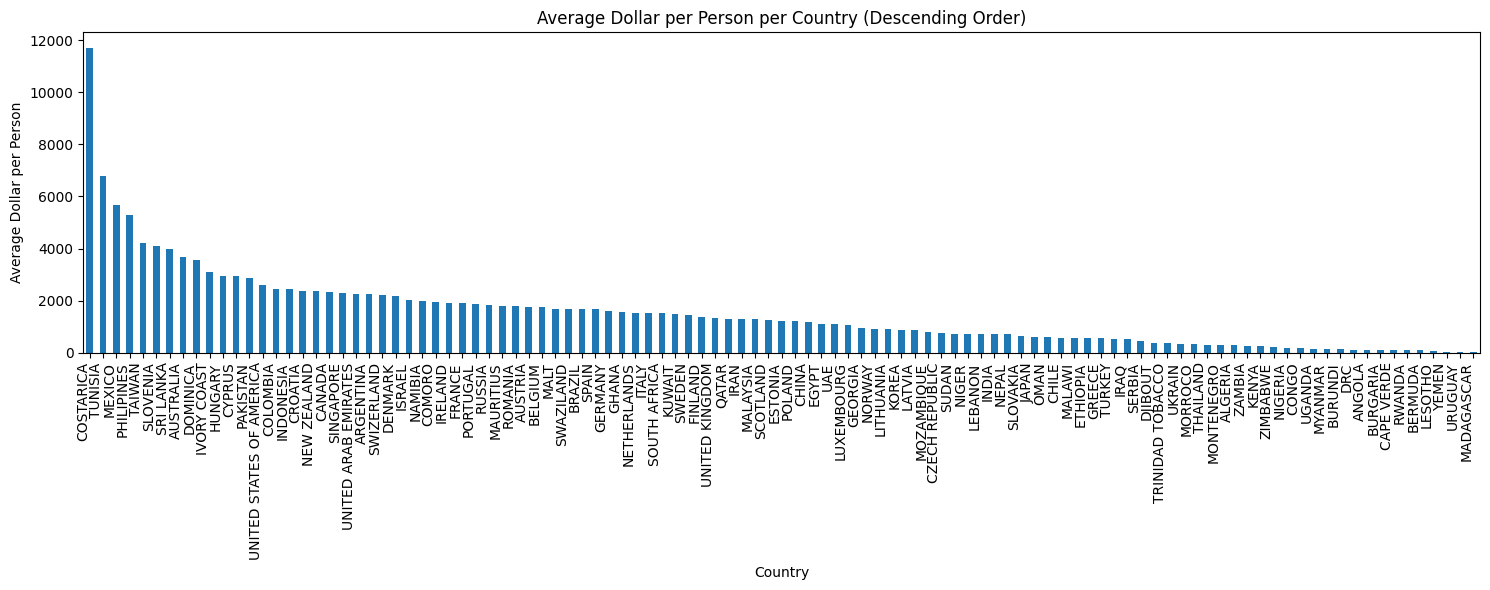

In [ ]:
# Sort countries by average dollar per person in descending order
sorted_avg_dollar = train_data.groupby('country')['avg_dollar_per_person'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(15, 6))
sorted_avg_dollar.plot(kind='bar')
plt.title('Average Dollar per Person per Country (Descending Order)')
plt.xlabel('Country')
plt.ylabel('Average Dollar per Person')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

23. do the average cost per one visit for each travel with classification for both poor and non poor countries

           travel_with  is_poor  total_cost_in_USD
0                Alone    False        2202.942344
1                Alone     True         732.923032
2             Children    False        6110.497556
3             Children     True        1590.334284
4    Friends/Relatives    False        5216.986912
5    Friends/Relatives     True        1594.494244
6               Spouse    False        5014.508070
7               Spouse     True        1960.901765
8  Spouse and Children    False        6396.165819
9  Spouse and Children     True        2530.607088


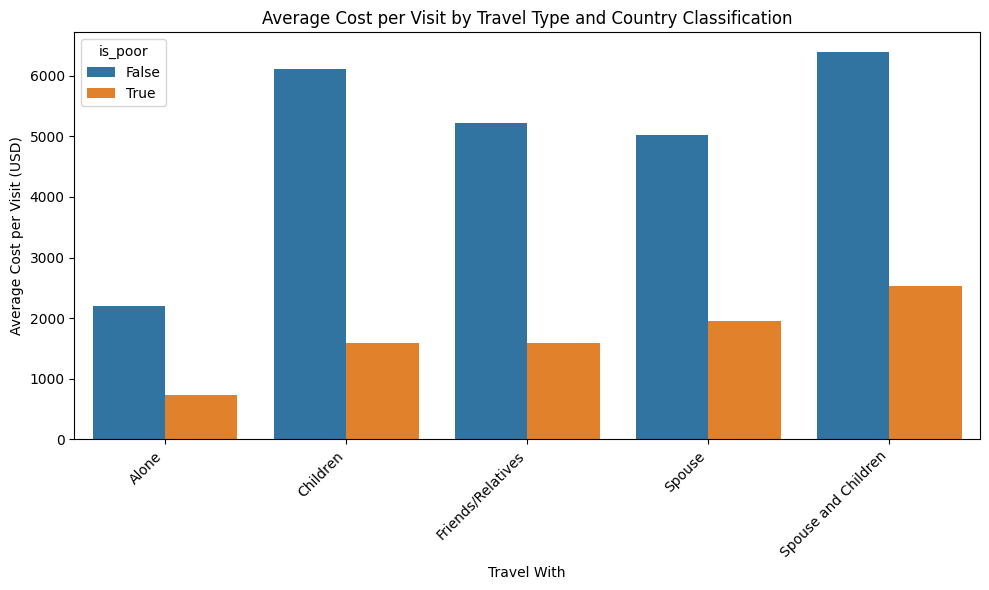

In [ ]:
# Calculate average cost per visit for each travel type, categorized by 'is_poor'
average_cost_per_visit = train_data.groupby(['travel_with', 'is_poor'])['total_cost_in_USD'].mean().reset_index()

# Display the result
print(average_cost_per_visit)


# Create a bar plot to visualize the average cost per visit
plt.figure(figsize=(10, 6))
sns.barplot(x='travel_with', y='total_cost_in_USD', hue='is_poor', data=average_cost_per_visit)
plt.xlabel('Travel With')
plt.ylabel('Average Cost per Visit (USD)')
plt.title('Average Cost per Visit by Travel Type and Country Classification')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

24. create a package column that will hold whether the person has at least used one package which means from all column names that has package in them if at least one of them are true

In [ ]:
train_data['tour_arrangement'] = train_data['tour_arrangement'].apply(lambda x: False if x == 'Independent' else True)
test_data['tour_arrangement'] = test_data['tour_arrangement'].apply(lambda x: False if x == 'Independent' else True)

package_columns = [col for col in train_data.columns if 'package' in col]

# Calculate the total number of packages per row
train_data['package'] = train_data[package_columns].apply(lambda row: sum(1 for val in row if val == 'Yes'), axis=1)

# Display the updated DataFrame
train_data['package']

,package
0,0
1,0
2,0
3,5
4,0
...,...
4804,0
4805,7
4806,0
4807,3


In [ ]:
test_data['package'] = test_data[package_columns].apply(lambda row: sum(1 for val in row if val == 'Yes'), axis=1)

25. group peoples into two whether they use package or not and calculate the average dollar spend and visualize that

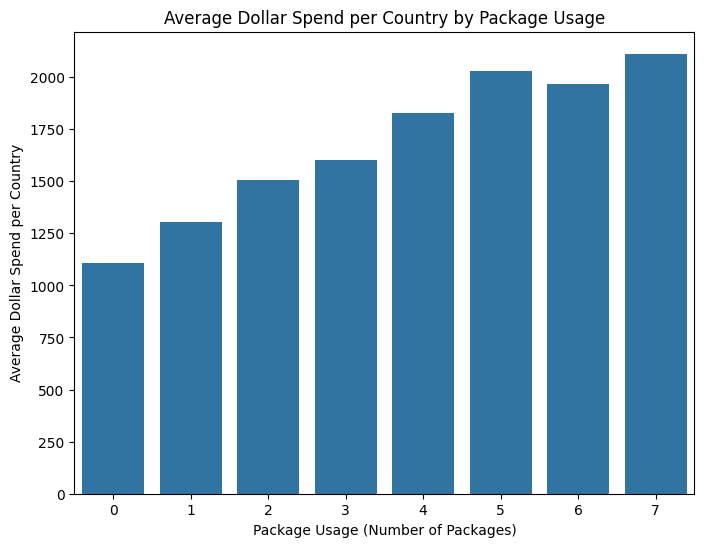

In [ ]:
# Group data by 'package' (assuming 'package' column represents package usage) and calculate average dollar spend
average_spend_by_package = train_data.groupby('package')['avg_dollar_per_person'].mean()

# Create a bar plot to visualize the average dollar spend for each group
plt.figure(figsize=(8, 6))
sns.barplot(x=average_spend_by_package.index, y=average_spend_by_package.values)
plt.xlabel('Package Usage (Number of Packages)')
plt.ylabel('Average Dollar Spend per Country')
plt.title('Average Dollar Spend per Country by Package Usage')
plt.show()

26. compare the dollar spend between people who have tour arrangement true and people who have tour arrangement false

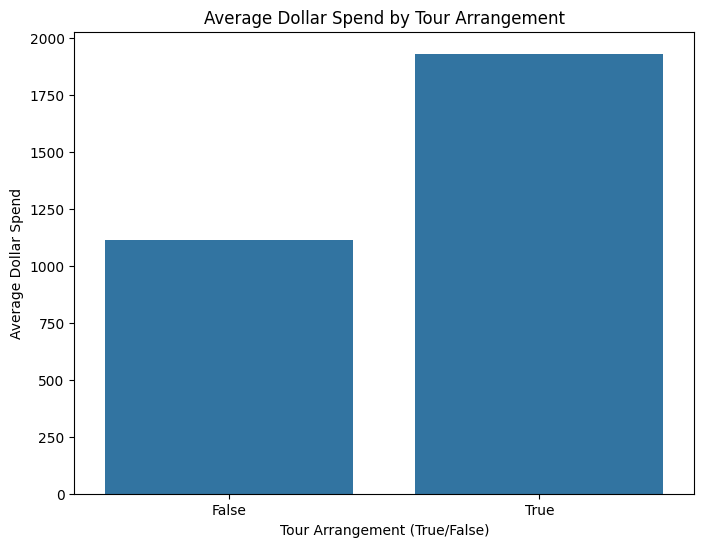

In [ ]:
# Group data by 'tour_arrangement' and calculate the average dollar spend
average_spend_by_tour = train_data.groupby('tour_arrangement')['avg_dollar_per_person'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=average_spend_by_tour.index, y=average_spend_by_tour.values)
plt.xlabel('Tour Arrangement (True/False)')
plt.ylabel('Average Dollar Spend')
plt.title('Average Dollar Spend by Tour Arrangement')
plt.show()

27. compare the average dollar from poor countries and rich countries

is_poor
False    2115.316630
True      666.838052
Name: avg_dollar_per_person, dtype: float64


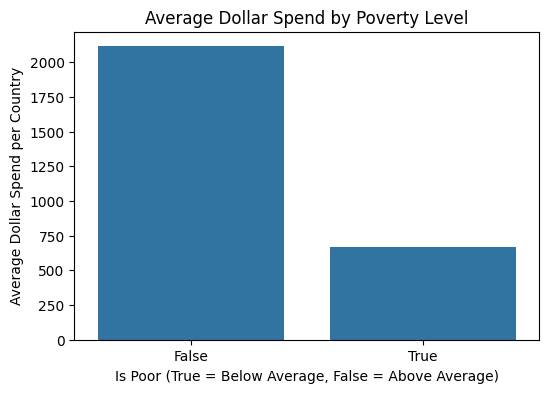

In [ ]:
# Group data by 'is_poor' and calculate the average 'avg_dollar_per_country'
average_dollar_by_poverty = train_data.groupby('is_poor')['avg_dollar_per_person'].mean()

# Print the result
print(average_dollar_by_poverty)

# Create a bar plot to visualize the difference
plt.figure(figsize=(6, 4))
sns.barplot(x=average_dollar_by_poverty.index, y=average_dollar_by_poverty.values)
plt.xlabel('Is Poor (True = Below Average, False = Above Average)')
plt.ylabel('Average Dollar Spend per Country')
plt.title('Average Dollar Spend by Poverty Level')
plt.show()

In [ ]:
train_data.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost', 'total_people', 'total_cost_in_USD',
       'total_cost_per_country', 'total_people_per_country',
       'avg_dollar_per_person', 'is_poor', 'package'],
      dtype='object')

28. compare the main activity values based on the total dollar they will generate and visualize it

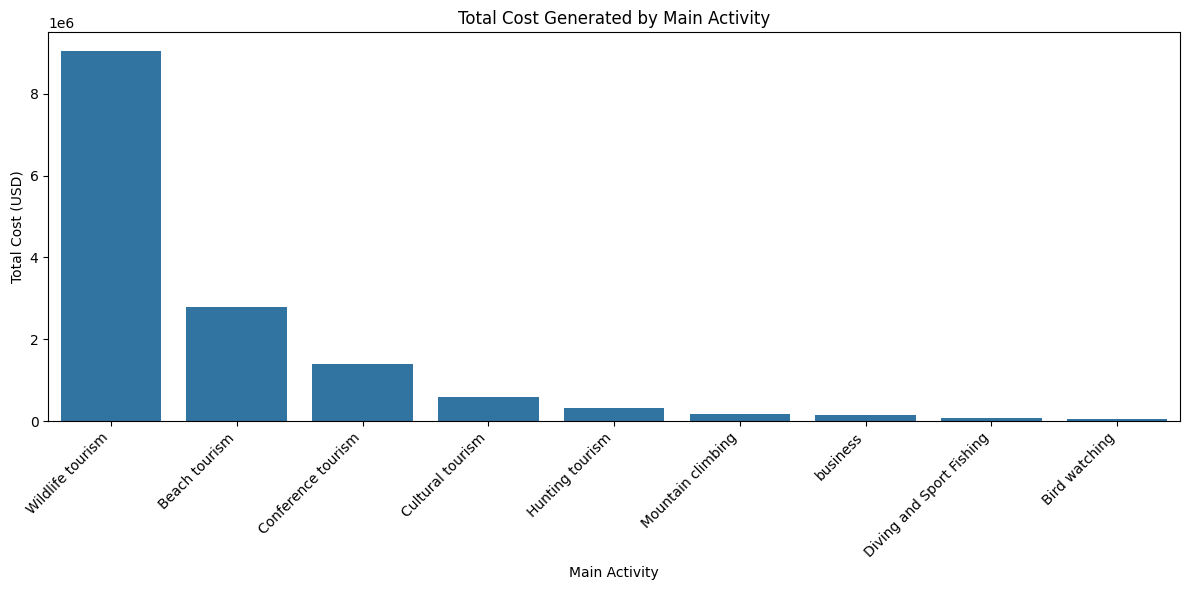

In [ ]:
# Group data by 'main_activity' and calculate the total cost for each activity
total_cost_by_activity = train_data.groupby('main_activity')['total_cost_in_USD'].sum()

# Sort the activities by total cost in descending order
sorted_activities = total_cost_by_activity.sort_values(ascending=False)

# Create a bar plot to visualize the total cost by activity
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_activities.index, y=sorted_activities.values)
plt.xlabel("Main Activity")
plt.ylabel("Total Cost (USD)")
plt.title("Total Cost Generated by Main Activity")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

29. create a new column called is wildlife  or beach tourism and fill it with boolean value based on the main activity

In [ ]:
# Create the 'is_wildlife_or_beach' column
train_data['is_wildlife_or_beach'] = train_data['main_activity'].apply(lambda x: True if x in ['Wildlife tourism', 'Beach tourism'] else False)


In [ ]:
test_data['is_wildlife_or_beach'] = test_data['main_activity'].apply(lambda x: True if x in ['Wildlife tourism', 'Beach tourism'] else False)

In [ ]:
test_data

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_people,total_people_per_country,is_poor,package,is_wildlife_or_beach
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",True,...,10,3,Cash,Yes,Wildlife,2.0,102.0,False,7,True
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,True,...,13,0,Cash,No,"Wonderful Country, Landscape, Nature",4.0,168.0,False,2,True
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",False,...,7,14,Cash,No,No comments,3.0,156.0,False,0,True
3,tour_1006,CANADA,1-24,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,False,...,0,4,Cash,Yes,Friendly People,2.0,58.0,False,0,False
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",True,...,10,0,Cash,Yes,Friendly People,4.0,320.0,True,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,tour_988,UNITED STATES OF AMERICA,25-44,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Newspaper, magazines,brochures",False,...,1,0,Cash,No,NaN,1.0,444.0,False,0,False
1597,tour_990,ITALY,45-64,Spouse and Children,3.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",True,...,10,5,Other,Yes,Wildlife,4.0,381.0,False,4,True
1598,tour_992,FINLAND,25-44,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Friends, relatives",False,...,6,0,Cash,Yes,No comments,1.0,8.0,True,0,False
1599,tour_996,SOUTH AFRICA,1-24,Alone,0.0,1.0,Business,Beach tourism,"Friends, relatives",False,...,4,0,Cash,Yes,Wildlife,1.0,168.0,False,0,True


30. based on the iswild life column compare the total cost in usd and visualize it don't take the average take the sum

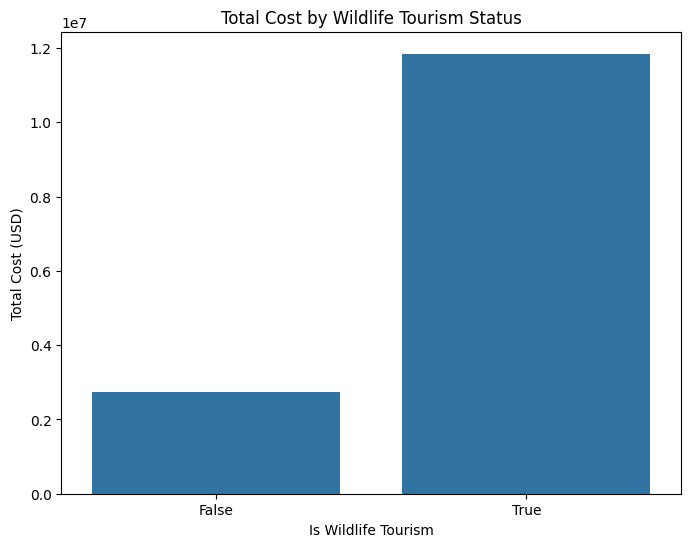

In [ ]:
# Group data by 'is_wildlife_tourism' and calculate the total cost for each category
total_cost_by_wildlife_tourism = train_data.groupby('is_wildlife_or_beach')['total_cost_in_USD'].sum()

# Create a bar plot to visualize the total cost by wildlife tourism status
plt.figure(figsize=(8, 6))
sns.barplot(x=total_cost_by_wildlife_tourism.index, y=total_cost_by_wildlife_tourism.values)
plt.xlabel("Is Wildlife Tourism")
plt.ylabel("Total Cost (USD)")
plt.title("Total Cost by Wildlife Tourism Status")
plt.show()

31. visualize the total money spend using the night zanzibar as a grouping method

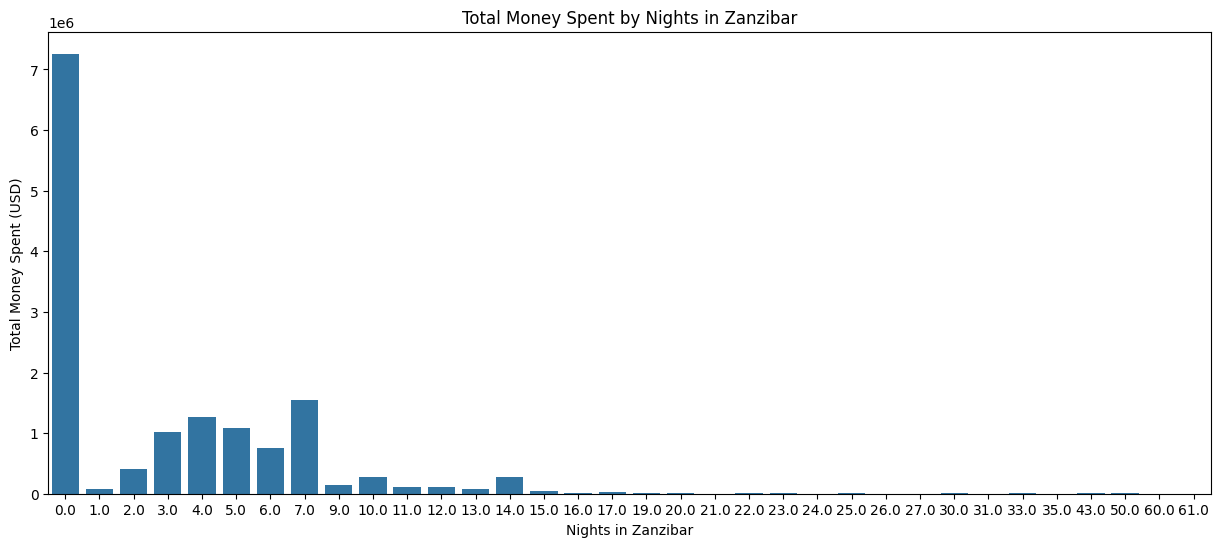

In [ ]:
# Group data by 'night_zanzibar' and calculate the total cost for each group
total_cost_by_night_zanzibar = train_data.groupby('night_zanzibar')['total_cost_in_USD'].sum()

# Create a bar plot to visualize the total cost by 'night_zanzibar'
plt.figure(figsize=(15, 6))
sns.barplot(x=total_cost_by_night_zanzibar.index, y=total_cost_by_night_zanzibar.values)
plt.xlabel("Nights in Zanzibar")
plt.ylabel("Total Money Spent (USD)")
plt.title("Total Money Spent by Nights in Zanzibar")
plt.show()

32. visualize the total cost based on the payment mode

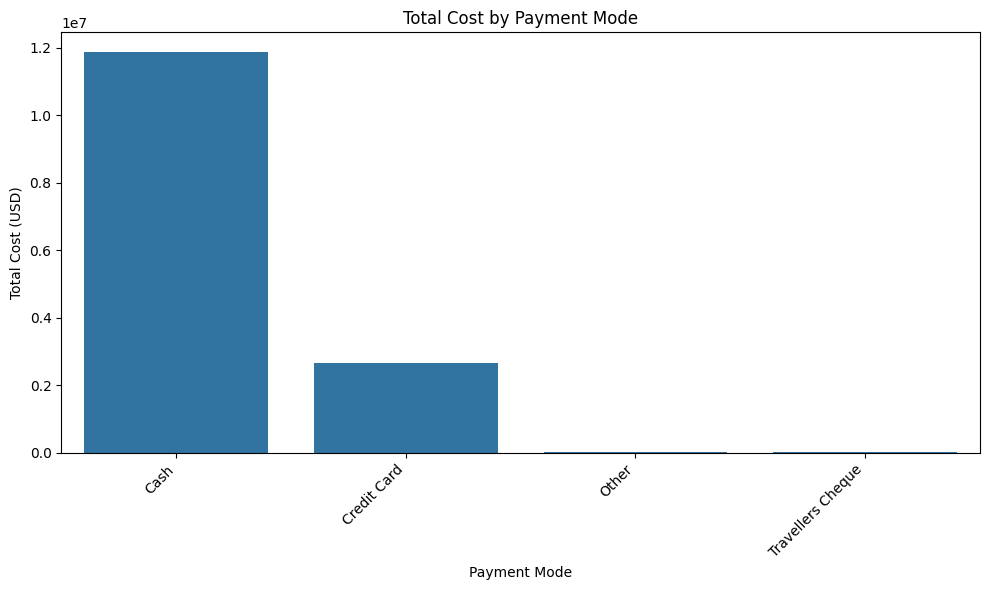

In [ ]:
# Group data by 'payment_mode' and calculate the total cost for each payment mode
total_cost_by_payment_mode = train_data.groupby('payment_mode')['total_cost_in_USD'].sum()

# Create a bar plot to visualize the total cost by payment mode
plt.figure(figsize=(10, 6))
sns.barplot(x=total_cost_by_payment_mode.index, y=total_cost_by_payment_mode.values)
plt.xlabel("Payment Mode")
plt.ylabel("Total Cost (USD)")
plt.title("Total Cost by Payment Mode")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

33. create two columns one for is cash and the other for is credit card  and populate them with  True based on whether they are cash or credit card

In [ ]:
# Create 'is_cash' and 'is_credit_card' columns
train_data['is_cash'] = train_data['payment_mode'].apply(lambda x: True if x == 'Cash' else False)
train_data['is_credit_card'] = train_data['payment_mode'].apply(lambda x: True if x == 'Credit Card' else False)

test_data['is_cash'] = test_data['payment_mode'].apply(lambda x: True if x == 'Cash' else False)
test_data['is_credit_card'] = test_data['payment_mode'].apply(lambda x: True if x == 'Credit Card' else False)

In [ ]:
train_data.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost', 'total_people', 'total_cost_in_USD',
       'total_cost_per_country', 'total_people_per_country',
       'avg_dollar_per_person', 'is_poor', 'package', 'is_wildlife_or_beach',
       'is_cash', 'is_credit_card'],
      dtype='object')

34. compare the total cost grouped by the first trip tz

first_trip_tz
No     2.280094e+06
Yes    1.231040e+07
Name: total_cost_in_USD, dtype: float64


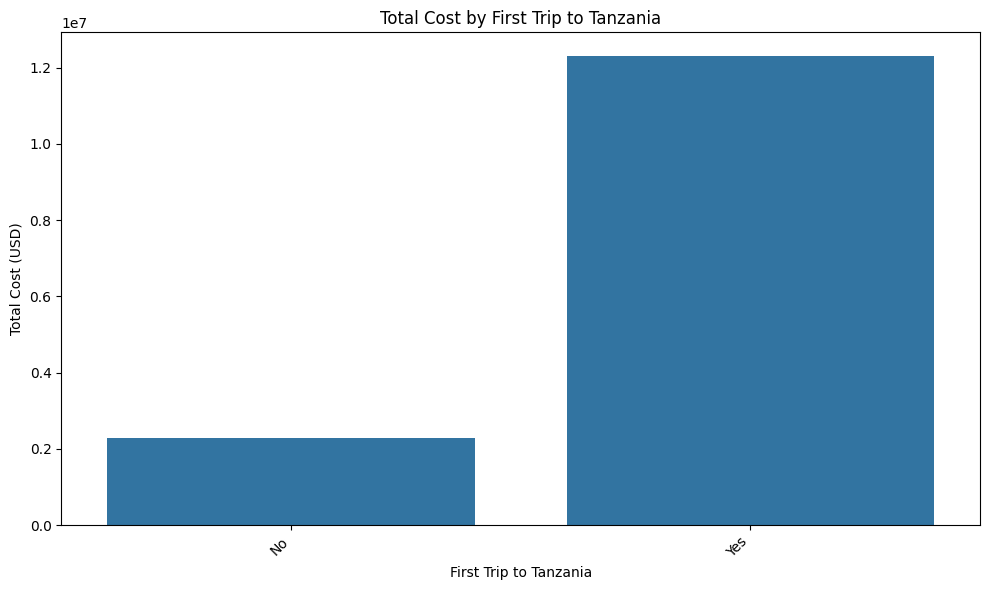

In [ ]:
# Group data by 'first_trip_tz' and calculate the total cost for each group
total_cost_by_first_trip = train_data.groupby('first_trip_tz')['total_cost_in_USD'].sum()

# Print the result
print(total_cost_by_first_trip)

# Create a bar plot to visualize the total cost by 'first_trip_tz'
plt.figure(figsize=(10, 6))
sns.barplot(x=total_cost_by_first_trip.index, y=total_cost_by_first_trip.values)
plt.xlabel("First Trip to Tanzania")
plt.ylabel("Total Cost (USD)")
plt.title("Total Cost by First Trip to Tanzania")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

35. compare the total cost based on the purpose

purpose
Business                          4.427707e+05
Leisure and Holidays              1.265640e+07
Meetings and Conference           3.163606e+05
Other                             7.135865e+04
Scientific and Academic           1.293669e+05
Visiting Friends and Relatives    7.464358e+05
Volunteering                      2.277960e+05
Name: total_cost_in_USD, dtype: float64


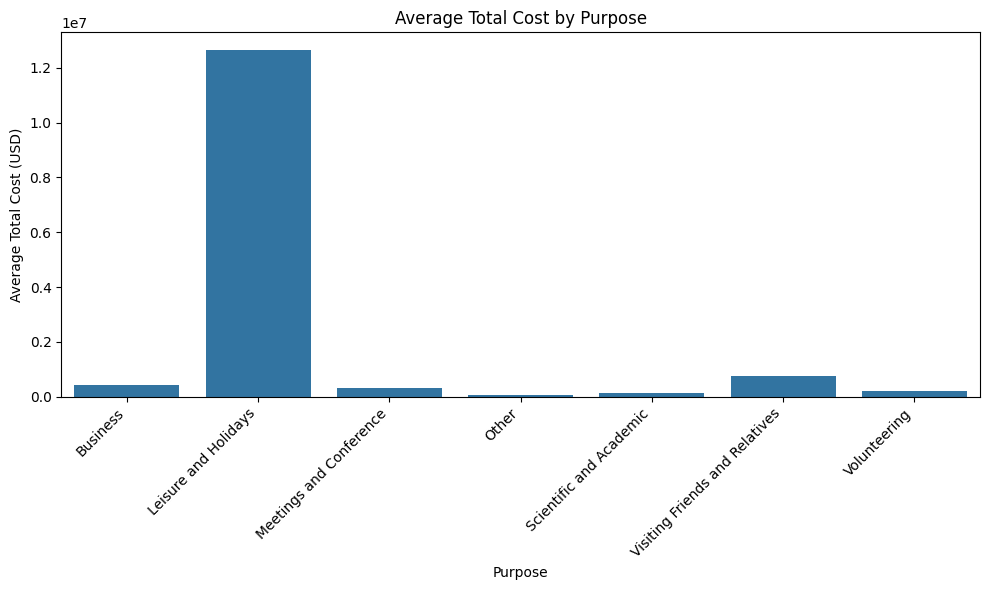

In [ ]:
# Group data by 'purpose' and calculate the average total cost in USD
average_cost_by_purpose = train_data.groupby('purpose')['total_cost_in_USD'].sum()

# Print the result
print(average_cost_by_purpose)

# Create a bar plot to visualize the average cost by purpose
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=average_cost_by_purpose.index, y=average_cost_by_purpose.values)
plt.xlabel("Purpose")
plt.ylabel("Average Total Cost (USD)")
plt.title("Average Total Cost by Purpose")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

36. create a column called is leisure and holidays and update it accordingly for both the test and train data

In [ ]:
# Create the 'is_leisure' column in both DataFrames
train_data['is_leisure'] = train_data['purpose'].apply(lambda x: True if x == 'Leisure and Holidays' else False)
test_data['is_leisure'] = test_data['purpose'].apply(lambda x: True if x == 'Leisure and Holidays' else False)

In [ ]:
train_data.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost', 'total_people', 'total_cost_in_USD',
       'total_cost_per_country', 'total_people_per_country',
       'avg_dollar_per_person', 'is_poor', 'package', 'is_wildlife_or_beach',
       'is_cash', 'is_credit_card', 'is_leisure'],
      dtype='object')

37. visualize the total cost in usd based on the isleisure column

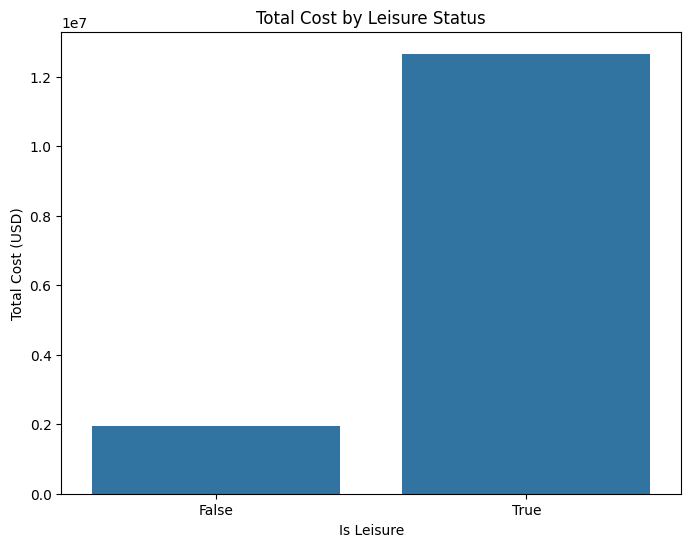

In [ ]:
# Group data by 'is_leisure' and calculate the total cost for each group
total_cost_by_leisure = train_data.groupby('is_leisure')['total_cost_in_USD'].sum()

# Create a bar plot to visualize the total cost by leisure status
plt.figure(figsize=(8, 6))
sns.barplot(x=total_cost_by_leisure.index, y=total_cost_by_leisure.values)
plt.xlabel("Is Leisure")
plt.ylabel("Total Cost (USD)")
plt.title("Total Cost by Leisure Status")
plt.show()

38. remove the columns that are associated with cost except for the total cost column

In [ ]:
# List of columns related to cost, excluding 'total_cost' and 'total_cost_in_USD'
cost_columns_to_remove = ['total_cost_per_country','total_cost_in_USD','avg_dollar_per_person']

# Remove the identified columns from train_data
train_data = train_data.drop(columns=cost_columns_to_remove)

# Display the updated DataFrame to verify the changes (optional)
train_data.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost', 'total_people', 'total_people_per_country', 'is_poor',
       'package', 'is_wildlife_or_beach', 'is_cash', 'is_credit_card',
       'is_leisure'],
      dtype='object')

In [ ]:
test_data.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_people', 'total_people_per_country', 'is_poor', 'package',
       'is_wildlife_or_beach', 'is_cash', 'is_credit_card', 'is_leisure'],
      dtype='object')

39. drop the most impressing column as it has many missing values and is not that much important. Since we can't fill around half values that are missing.

In [ ]:
# Drop the column named 'most_impressing' if it exists
if 'most_impressing' in train_data.columns:
    train_data = train_data.drop(columns=['most_impressing'])
    print("'most_impressing' column dropped successfully.")
else:
    print("'most_impressing' column not found in the DataFrame.")

# Display the updated DataFrame (optional)
# print(train_data.columns)

'most_impressing' column dropped successfully.


In [ ]:
# Drop the column named 'most_impressing' if it exists
if 'most_impressing' in test_data.columns:
    test_data = test_data.drop(columns=['most_impressing'])
    print("'most_impressing' column dropped successfully from test data.")
else:
    print("'most_impressing' column not found in the test DataFrame.")

'most_impressing' column dropped successfully from test data.


40. convert all the columns with yes or no into true or false which is a boolean value for both the test data and the train data to improve efficiency

In [ ]:
# Define a function to convert 'yes'/'no' to True/False
def convert_yes_no_to_boolean(df):
    for col in df.columns:
        if df[col].dtype == 'object' and set(df[col].unique()) <= {'Yes', 'No'}:
            df[col] = df[col].map({'Yes': True, 'No': False})
    return df


# Apply the function to both DataFrames
train_data = convert_yes_no_to_boolean(train_data)
test_data = convert_yes_no_to_boolean(test_data)

41. If there is a data type mismatch between the test and train data set make sure to match them

In [ ]:
for col in test_data.columns:
    # Check if the column's data type is float
    if test_data[col].dtype == 'float64':
        # Attempt to convert the column to integer type
        try:
            test_data[col] = test_data[col].astype(int)
        except ValueError:
            # Handle cases where conversion is not possible due to non-integer values
            print(f"Column '{col}' contains non-integer values and cannot be converted to int.")


In [ ]:
test_data.dtypes

,0
ID,object
country,object
age_group,object
travel_with,object
total_female,int64
total_male,int64
purpose,object
main_activity,object
info_source,object
tour_arrangement,bool


In [ ]:
# # Iterate through columns of the DataFrame
for col in train_data.columns:
    # Check if the column's data type is float
    if train_data[col].dtype == 'float64':
        # Attempt to convert the column to integer type
        try:
            train_data[col] = train_data[col].astype(int)
        except ValueError:
            # Handle cases where conversion is not possible due to non-integer values
            print(f"Column '{col}' contains non-integer values and cannot be converted to int.")



42. prepare the data to be trained by dropping the target column

In [ ]:
X, y = train_data.drop(columns=["total_cost"]), train_data["total_cost"]

In [ ]:
# create training and testing vars
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, random_state = 42)

y_train_log2 = np.log2(y_train)


print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3606, 29) (3606,)
(1203, 29) (1203,)


In [ ]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

predictions = []
categorical_features = ['country', 'age_group', 'travel_with', 'purpose', 'main_activity', 'info_source',
        'payment_mode','ID']
for i in range(10):
    ct=CatBoostRegressor(iterations=1000,
                    loss_function='MAE',
                    logging_level='Silent',
                    depth = i,
                    cat_features = categorical_features
                    )
    ct.fit(X_train, y_train)
    preds = ct.predict(X_test)
    # preds = 2**preds
    predictions.append((i, mean_absolute_error(y_test, preds)))

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, preds)

print('mea = {}'.format(mae))

mea = 4589581.334215608


In [ ]:
best_model = CatBoostRegressor(iterations=1000,
                    loss_function='MAE',
                    logging_level='Silent',
                    depth = 7,
                    cat_features = categorical_features
                    )
best_model.fit(X_train, y_train)

# mae
preds = best_model.predict(X_test)
mae = mean_absolute_error(y_test, preds)

print('mea = {}'.format(mae))

mea = 4582044.926472655


In [ ]:
categorical_features

['country',
 'age_group',
 'travel_with',
 'purpose',
 'main_activity',
 'info_source',
 'payment_mode',
 'ID']

In [ ]:
train_data.dtypes

,0
ID,object
country,object
age_group,object
travel_with,object
total_female,int64
total_male,int64
purpose,object
main_activity,object
info_source,object
tour_arrangement,bool


In [ ]:
test_data.dtypes

,0
ID,object
country,object
age_group,object
travel_with,object
total_female,int64
total_male,int64
purpose,object
main_activity,object
info_source,object
tour_arrangement,bool


In [ ]:
y_pred_best = best_model.predict(test_data)
# y_pred = 2**y_pred
sub_df = pd.DataFrame({'ID': test_data['ID'], 'total_cost': y_pred_best})

from datetime import datetime
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
sub_df.to_csv(FILE_PATH + "submission_" + current_time + "__outlier_detected_depth=7.csv", index=False)

In [ ]:
# predict
y_pred = ct.predict(test_data)
# y_pred = 2**y_pred
sub_df = pd.DataFrame({'ID': test_data['ID'], 'total_cost': y_pred})

In [ ]:
## save to
from datetime import datetime
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
sub_df.to_csv(FILE_PATH + "submission_" + current_time + "__outlier_detected.csv", index=False)


Text(0.5, 0, 'Importance')

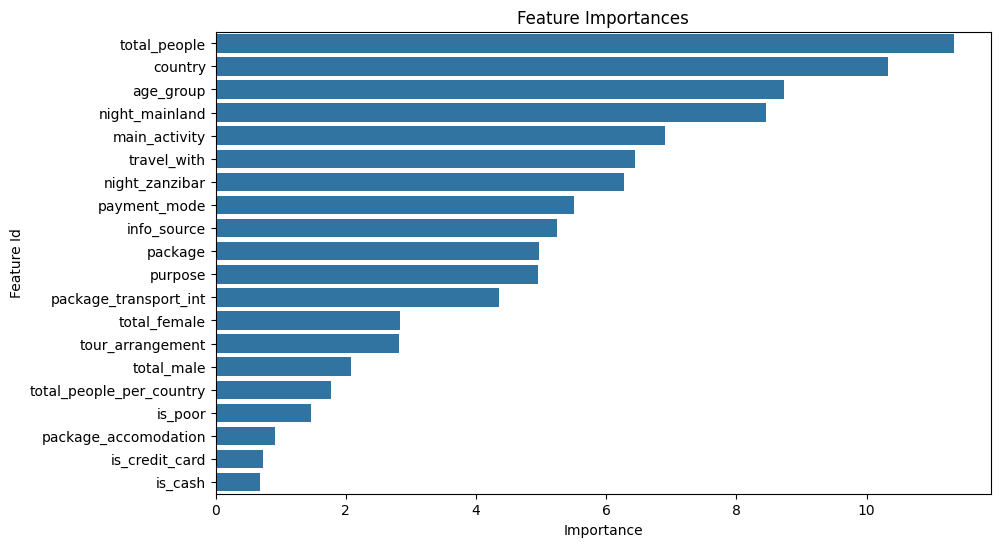

In [ ]:
# feature importances
feature_importances = best_model.get_feature_importance(prettified=True)
feature_importances
# plot barchart
plt.figure(figsize=(10, 6))
sns.barplot(x="Importances", y="Feature Id", data=feature_importances.head(20))
plt.title("Feature Importances")
plt.xlabel("Importance")

In [ ]:
# K-fold splitting
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

